<div style="text-align: center;">
    <a href="https://www.dataia.eu/">
        <img border="0" src="https://github.com/ramp-kits/template-kit/raw/main/img/DATAIA-h.png" width="90%"></a>
</div>

# Template Kit for RAMP challenge

<i> Thomas Moreau (Inria) </i>

## Introduction

Superconductors are materials that can conduct electricity without resistance when cooled below a specific critical temperature (Tc). This unique property has significant implications in various technological and industrial applications, including Magnetic Resonance Imaging (MRI), high-speed maglev trains, and energy-efficient power grids. However, the widespread adoption of superconductors is hindered by the challenge of predicting their critical temperature, which typically requires extensive experimental research.

The goal of this challenge is to develop predictive models that can accurately estimate the critical temperature of superconducting materials based on their chemical composition and physical properties. By leveraging machine learning techniques, participants will contribute to advancing materials science by creating data-driven models that could accelerate the discovery of new superconductors with desirable properties.

### Where the data comes from

The dataset for this challenge originates from the ***Superconducting Material Database maintained by Japan's National Institute for Materials Science (NIMS)***,  available at http://supercon.nims.go.jp/index_en.html. This database aggregates information about superconductors, including their chemical composition and experimentally determined critical temperatures.

The dataset used in this challenge was curated and analyzed by ***Kam Hamidieh*** in his research paper *"A Data-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor"* published in 2018 in Computational Materials Science. It contains information on 21,263 superconductors and 81 extracted features that are useful for modeling the critical temperature. The features are derived from elemental properties such as atomic mass, thermal conductivity, valence, and electron affinity.

The dataset contains files: 

1. `train.csv`: Contains 81 features extracted from 21,263 superconductors along with their corresponding critical temperatures `Tc`(the target).

2. `unique_m.csv`: Provides the chemical formulas of the superconductors in the dataset.

For this challenge the participant will only use the data extracted from the superconductors along with their corresponding critical temperatures.

### The task of the challenge

Participants are required to build a machine learning model that predicts the critical temperature (Tc) of superconducting materials based on their extracted features. The primary objective is to develop an accurate predictive model that can generalize well to unseen superconductors.  

Each superconducting material in the dataset is represented by 81 numerical features, which are derived from its chemical composition and elemental properties. These features include atomic mass, electron affinity, thermal conductivity, valence, and other physicochemical characteristics. The challenge is to identify patterns and relationships within this high-dimensional feature space that contribute to determining the critical temperature of a given material.  

To achieve this, participants will preprocess the dataset, explore feature selection or transformation techniques, and experiment with different machine learning models. The success of the model will depend on effectively capturing complex interactions between the material’s properties and its superconducting behavior.  

This competition presents a unique opportunity to leverage data science in materials research, where data-driven approaches can accelerate the discovery of new superconducting materials and improve our understanding of the underlying physics governing their behavior.

### Motivation

Superconductors have the potential to revolutionize multiple industries, particularly in energy transmission and advanced computing. However, predicting the critical temperature of new superconducting materials remains a complex challenge due to the absence of a well-defined theoretical model. Traditional approaches rely on experimental testing, which is both time-consuming and expensive.

This challenge presents an opportunity to harness the power of data science and machine learning to address this problem. By analyzing a large dataset of superconductors and their properties, participants can build predictive models that could aid scientists in identifying promising materials without the need for exhaustive experimental testing. A successful model could significantly accelerate the discovery of high-temperature superconductors, which are crucial for developing more energy-efficient technologies and advancing scientific research in condensed matter physics.

By participating in this challenge, data scientists and researchers can contribute to an important scientific endeavor while gaining hands-on experience in applying machine learning techniques to real-world physics and chemistry problems.

## Requirements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline
pd.set_option('display.max_columns', None)


# Exploratory data analysis

The goal of this section is to show what's in the data, and how to play with it.
This is the first set in any data science project, and here, you should give a sense of the data the participants will be working with.

You can first load and describe the data, and then show some interesting properties of it.

### Load the data

The goal of this section is to provide an overview of the dataset, its components, and its structure, helping participants understand the data they will work with.

#### Dataset overview

The dataset consists of two files containing information on 21,263 superconductors:

1. `train.csv`: This file contains 81 numerical features extracted from superconducting materials, as well as their corresponding critical temperature (Tc) in the 82nd column. The features are derived from various physicochemical properties of the elements that compose the materials.

2. `unique_m.csv`: This file contains the chemical formulas of the materials found in train.csv.
> This file contains additional data that will not be used in this data challenge.

The dataset is **multivariate**, meaning it contains multiple variables per instance, and all features are either **real-valued (float)** or **integer-valued (int)**. There are no missing values in the dataset.

#### Data shape and structure

- **Number of instances**: 21,263 superconductors.

- **Number of features**: 81 numerical attributes.

- **Target variable**: Critical temperature (Tc).

####  Feature description

The 81 features describe different **atomic, electronic, and thermal properties** of superconducting materials. Below is a grouped description of these features along with their definitions and units (where applicable): 

- **1. `number_of_elements`**: The number of different elements in the superconductor’s chemical composition (unitless).  

- **2. <a href = "https://www.wikiwand.com/en/articles/Atomic_mass">Atomic Mass</a> Features**  
    These features describe the **mass of constituent atoms** in the material. The atomic mass is measured in **atomic mass units (amu)**.  
    - **`mean_atomic_mass`**: The average atomic mass of all elements in the material.  
    - **`wtd_mean_atomic_mass`**: The weighted mean atomic mass, considering atomic proportions.  
    - **`gmean_atomic_mass`**: The geometric mean of atomic masses.  
    - **`wtd_gmean_atomic_mass`**: Weighted geometric mean of atomic masses.  
    - **`entropy_atomic_mass`**: The entropy (measure of disorder) in the distribution of atomic masses.  
    - **`wtd_entropy_atomic_mass`**: Weighted entropy of atomic mass distribution.  
    - **`range_atomic_mass`**: The range (difference between max and min) of atomic masses.  
    - **`wtd_range_atomic_mass`**: Weighted range of atomic masses.  
    - **`std_atomic_mass`**: Standard deviation of atomic masses.  
    - **`wtd_std_atomic_mass`**: Weighted standard deviation of atomic masses.  


- **3. <a href ="https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Physical_Properties_of_Matter/Atomic_and_Molecular_Properties/Ionization_Energy/Ionization_Energies#:~:text=The%20first%20ionization%20energy%20is%20the%20energy%20required,%5B%20X%20%28g%29%20rightarrow%20X%5E%2B%20%28g%29%20%2B%20e%5E-%5D">First Ionization Energy (FIE)</a> Features**  
    First ionization energy refers to the **energy required to remove the first electron from an atom**. It is measured in **electron volts (eV)**.  
    - **`mean_fie`**: The average first ionization energy of the elements in the material.  
    - **`wtd_mean_fie`**: Weighted mean first ionization energy.  
    - **`gmean_fie`**: Geometric mean of first ionization energies.  
    - **`wtd_gmean_fie`**: Weighted geometric mean of first ionization energies.  
    - **`entropy_fie`**: Entropy of ionization energy distribution.  
    - **`wtd_entropy_fie`**: Weighted entropy of ionization energy distribution.  
    - **`range_fie`**: The range of first ionization energies.  
    - **`wtd_range_fie`**: Weighted range of first ionization energies.  
    - **`std_fie`**: Standard deviation of first ionization energies.  
    - **`wtd_std_fie`**: Weighted standard deviation of first ionization energies.  

- **4. Atomic Radius Features**  
    Atomic radius refers to the **size of atoms** in the material. It is measured in **angstroms (Å)**.  
    - **`mean_atomic_radius`**: The average atomic radius of elements in the material.  
    - **`wtd_mean_atomic_radius`**: Weighted mean atomic radius.  
    - **`gmean_atomic_radius`**: Geometric mean of atomic radii.  
    - **`wtd_gmean_atomic_radius`**: Weighted geometric mean of atomic radii.  
    - **`entropy_atomic_radius`**: Entropy of atomic radius distribution.  
    - **`wtd_entropy_atomic_radius`**: Weighted entropy of atomic radius distribution.  
    - **`range_atomic_radius`**: The range of atomic radii.  
    - **`wtd_range_atomic_radius`**: Weighted range of atomic radii.  
    - **`std_atomic_radius`**: Standard deviation of atomic radii.  
    - **`wtd_std_atomic_radius`**: Weighted standard deviation of atomic radii.  

- **5. Density Features**  
    Density refers to **mass per unit volume** of the material. It is measured in **grams per cubic centimeter (g/cm³)**.  
    - **`mean_Density`**: The average density of elements in the material.  
    - **`wtd_mean_Density`**: Weighted mean density.  
    - **`gmean_Density`**: Geometric mean of density values.  
    - **`wtd_gmean_Density`**: Weighted geometric mean of density values.  
    - **`entropy_Density`**: Entropy of density distribution.  
    - **`wtd_entropy_Density`**: Weighted entropy of density distribution.  
    - **`range_Density`**: The range of densities.  
    - **`wtd_range_Density`**: Weighted range of densities.  
    - **`std_Density`**: Standard deviation of densities.  
    - **`wtd_std_Density`**: Weighted standard deviation of densities.  


- **6. Electron Affinity Features**  
    Electron affinity refers to **the energy change when an atom gains an electron**. It is measured in **electron volts (eV)**.  
    - **`mean_ElectronAffinity`**: The average electron affinity of elements in the material.  
    - **`wtd_mean_ElectronAffinity`**: Weighted mean electron affinity.  
    - **`gmean_ElectronAffinity`**: Geometric mean of electron affinities.  
    - **`wtd_gmean_ElectronAffinity`**: Weighted geometric mean of electron affinities.  
    - **`entropy_ElectronAffinity`**: Entropy of electron affinity distribution.  
    - **`wtd_entropy_ElectronAffinity`**: Weighted entropy of electron affinity distribution.  
    - **`range_ElectronAffinity`**: The range of electron affinities.  
    - **`wtd_range_ElectronAffinity`**: Weighted range of electron affinities.  
    - **`std_ElectronAffinity`**: Standard deviation of electron affinities.  
    - **`wtd_std_ElectronAffinity`**: Weighted standard deviation of electron affinities.  

- **7. Fusion Heat Features**  
    Fusion heat refers to the **amount of energy required to melt a solid**. It is measured in **kilojoules per mole (kJ/mol)**.  
    - **`mean_FusionHeat`**: The average heat of fusion of elements in the material.  
    - **`wtd_mean_FusionHeat`**: Weighted mean heat of fusion.  
    - **`gmean_FusionHeat`**: Geometric mean of fusion heat values.  
    - **`wtd_gmean_FusionHeat`**: Weighted geometric mean of fusion heat values.  
    - **`entropy_FusionHeat`**: Entropy of fusion heat distribution.  
    - **`wtd_entropy_FusionHeat`**: Weighted entropy of fusion heat distribution.  
    - **`range_FusionHeat`**: The range of fusion heat values.  
    - **`wtd_range_FusionHeat`**: Weighted range of fusion heat values.  
    - **`std_FusionHeat`**: Standard deviation of fusion heat values.  
    - **`wtd_std_FusionHeat`**: Weighted standard deviation of fusion heat values.  

- **8. Thermal Conductivity Features**  
    Thermal conductivity measures a material’s ability to **conduct heat**. It is measured in **watts per meter-kelvin (W/m·K)**.  
    - **`mean_ThermalConductivity`**: The average thermal conductivity of elements in the material.  
    - **`wtd_mean_ThermalConductivity`**: Weighted mean thermal conductivity.  
    - **`gmean_ThermalConductivity`**: Geometric mean of thermal conductivity values.  
    - **`wtd_gmean_ThermalConductivity`**: Weighted geometric mean of thermal conductivity values.  
    - **`entropy_ThermalConductivity`**: Entropy of thermal conductivity distribution.  
    - **`wtd_entropy_ThermalConductivity`**: Weighted entropy of thermal conductivity distribution.  
    - **`range_ThermalConductivity`**: The range of thermal conductivities.  
    - **`wtd_range_ThermalConductivity`**: Weighted range of thermal conductivities.  
    - **`std_ThermalConductivity`**: Standard deviation of thermal conductivities.  
    - **`wtd_std_ThermalConductivity`**: Weighted standard deviation of thermal conductivities.  

- **9. Valence Features**  
    Valence refers to **the number of electrons in an atom’s outermost shell**. It determines bonding properties.  
    - **`mean_Valence`**: The average valence of elements in the material.  
    - **`wtd_mean_Valence`**: Weighted mean valence.  
    - **`gmean_Valence`**: Geometric mean of valence values.  
    - **`wtd_gmean_Valence`**: Weighted geometric mean of valence values.  
    - **`entropy_Valence`**: Entropy of valence distribution.  
    - **`wtd_entropy_Valence`**: Weighted entropy of valence distribution.  
    - **`range_Valence`**: The range of valence values.  
    - **`wtd_range_Valence`**: Weighted range of valence values.  
    - **`std_Valence`**: Standard deviation of valence values.  
    - **`wtd_std_Valence`**: Weighted standard deviation of valence values.  

Each of these features is designed to capture different aspects of the elements that compose a superconducting material, which may influence its critical temperature.



The following cell will load the dataset into `X_train.csv` and `X_test.csv`, enabling participants to begin analyzing and working with the data for this challenge.
Let's load the data and explore it.
First, download the data by runing the cell below:

In [ ]:
# Uncomment the following line to download data:
# !python download_data.py

Loading the data...done


In [3]:
# get the training data and the label
import problem
X_df, y = problem.get_train_data()

### Data exploration

#### Basic summaries of the data

In [22]:
# Display basic information about X_df
print("Shape of X_df:", X_df.shape)
print("Shape of y:", y.shape)

# Display first few rows
display(X_df.head())

# Check for missing values
print("\nMissing Values:\n", X_df.isnull().sum().sort_values(ascending=False))
print("\n")
# Data types and general info
X_df.info()


Shape of X_df: (14884, 81)
Shape of y: (14884,)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,121.772463,111.425074,118.074369,109.915739,1.354499,1.230656,84.14815,40.230950,31.444742,19.984931,682.525000,731.720000,677.882078,727.207385,1.379388,1.126596,200.5,356.525000,80.814831,79.529583,187.000000,174.500000,184.283260,172.731125,1.371989,1.230975,77,67.850000,31.376743,25.455844,7593.750000,9114.35000,7128.519585,8533.771001,1.322859,0.965222,7551.000,5518.750000,2760.985184,3049.765282,61.650000,64.105000,55.690857,58.849852,1.284278,1.105229,77.70,23.737500,28.727382,27.232508,10.700000,12.672500,10.064739,11.859815,1.324312,0.980076,9.700,7.772500,3.846427,4.276972,48.500000,58.150000,42.141663,52.096228,1.270909,0.962262,54.00000,32.575000,21.971573,20.639222,3.500000,3.750000,3.464102,3.722419,1.376055,1.131787,1,1.775000,0.500000,0.433013
1,3,87.468333,81.994500,82.555758,76.688241,1.041270,1.039695,71.75500,22.488000,29.905282,31.107850,856.166667,828.330000,852.858789,825.121593,1.094784,1.058065,181.3,191.470000,74.569624,73.515632,127.333333,135.500000,125.493812,133.690725,1.084025,0.958512,53,57.400000,21.853045,21.639085,6311.000000,6772.80000,6186.508901,6656.477485,1.078970,0.948238,3055.000,2973.200000,1248.208583,1206.213232,135.133333,105.410000,86.530864,57.706318,0.839248,0.902878,179.30,48.910000,83.414480,88.225670,12.233333,13.230000,10.925390,12.283714,1.002899,0.910808,12.100,5.820000,5.062498,4.230142,27.506667,40.504000,4.976422,10.843028,0.194158,0.124380,78.48000,39.396000,36.425359,38.505585,5.000000,4.500000,4.762203,4.242641,1.054920,1.085189,3,0.600000,1.414214,1.500000
2,4,76.444563,51.852409,59.356672,35.408090,1.199541,1.289209,121.32760,14.534284,43.823354,44.326167,794.000000,998.295618,741.629349,932.138069,1.315004,0.902642,810.6,648.467762,311.743492,342.893635,164.500000,115.683881,139.000514,90.655486,1.256701,1.338590,205,23.004695,77.525802,79.427944,4235.857250,3003.26202,669.556588,70.873175,1.015407,0.812737,8958.571,2102.528277,3194.938946,3649.485248,77.237500,108.595462,53.527965,85.799569,1.105182,0.771919,127.05,73.180751,54.830755,49.674062,8.180500,5.336867,4.035569,1.378886,1.112098,1.040955,12.878,2.957343,4.948155,5.657976,108.756645,98.057920,7.552385,1.168787,0.336262,0.203108,399.97342,93.882612,168.301047,167.381743,2.250000,2.078247,2.213364,2.064470,1.368922,1.210725,1,0.826291,0.433013,0.268560
3,7,115.323400,87.712408,83.550312,68.206982,1.703770,1.536464,192.98100,33.926728,76.422671,63.41


Missing Values:
 number_of_elements           0
mean_ElectronAffinity        0
std_FusionHeat               0
wtd_range_FusionHeat         0
range_FusionHeat             0
                            ..
wtd_entropy_atomic_radius    0
entropy_atomic_radius        0
wtd_gmean_atomic_radius      0
gmean_atomic_radius          0
wtd_std_Valence              0
Length: 81, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14884 entries, 0 to 14883
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               14884 non-null  int64  
 1   mean_atomic_mass                 14884 non-null  float64
 2   wtd_mean_atomic_mass             14884 non-null  float64
 3   gmean_atomic_mass                14884 non-null  float64
 4   wtd_gmean_atomic_mass            14884 non-null  float64
 5   entropy_atomic_mass              14884 non-null  float64
 6   wtd_

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
count,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000
mean,4.113813,87.415265,72.816580,71.169812,58.393849,1.165600,1.062990,115.514199,33.247778,44.371980,41.390908,769.566838,870.415411,737.447335,832.752946,1.299132,0.925464,571.451633,484.457735,215.452663,223.854617,157.915216,134.670977,144.405282,120.956824,1.267831,1.129899,139.073838,51.545341,51.509668,52.262009,6104.471101,5250.307708,3456.301237,3106.680293,1.072135,0.855354,8652.836247,2895.728383,3413.198852,3309.183302,76.890673,92.587847,54.297059,72.227152,1.069678,0.769834,120.785585,59.352190,48.953035,44.441268,14.245443,13.779834,10.101978,10.087809,1.093006,0.913370,21.090698,8.174627,8.298254,7.689303,89.964745,81.521680,29.840671,27.267352,0.726688,0.540369,251.634174,62.042217,99.312004,96.374996,3.194822,3.148243,3.053126,3.051443,1.295486,1.051949,2.040513,1.481813,0.839534,0.673395
std,1.436959,29.614678,33.391729,30.931995,36.523380,0.364703,0.401024,54.514432,27.037671,20.004399,19.983463,87.055769,143.355989,77.861231,119.723007,0.381038,0.333700,309.706250,223.854336,110.119651,128.143759,20.058808,28.785322,22.011201,35.838013,0.374456,0.407011,67.307032,35.152048,22.908984,25.326802,2828.686645,3188.982458,3686.639275,3946.437643,0.342352,0.319748,4108.545435,2374.729267,1677.134204,1612.514217,27.667582,32.216291,28.885259,31.545064,0.343555,0.285434,58.726540,28.625877,21.837787,20.577308,11.172114,14.

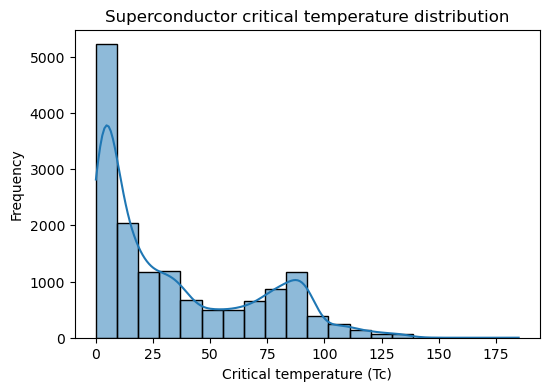

In [27]:
# Display statistical summary
display(X_df.describe())

# Check the target variable distribution
plt.figure(figsize=(6,4))
sns.histplot(y, bins=20, kde=True)
plt.title("Superconductor critical temperature distribution")
plt.xlabel("Critical temperature (Tc)")
plt.ylabel("Frequency")
plt.show()


In [14]:
X_df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

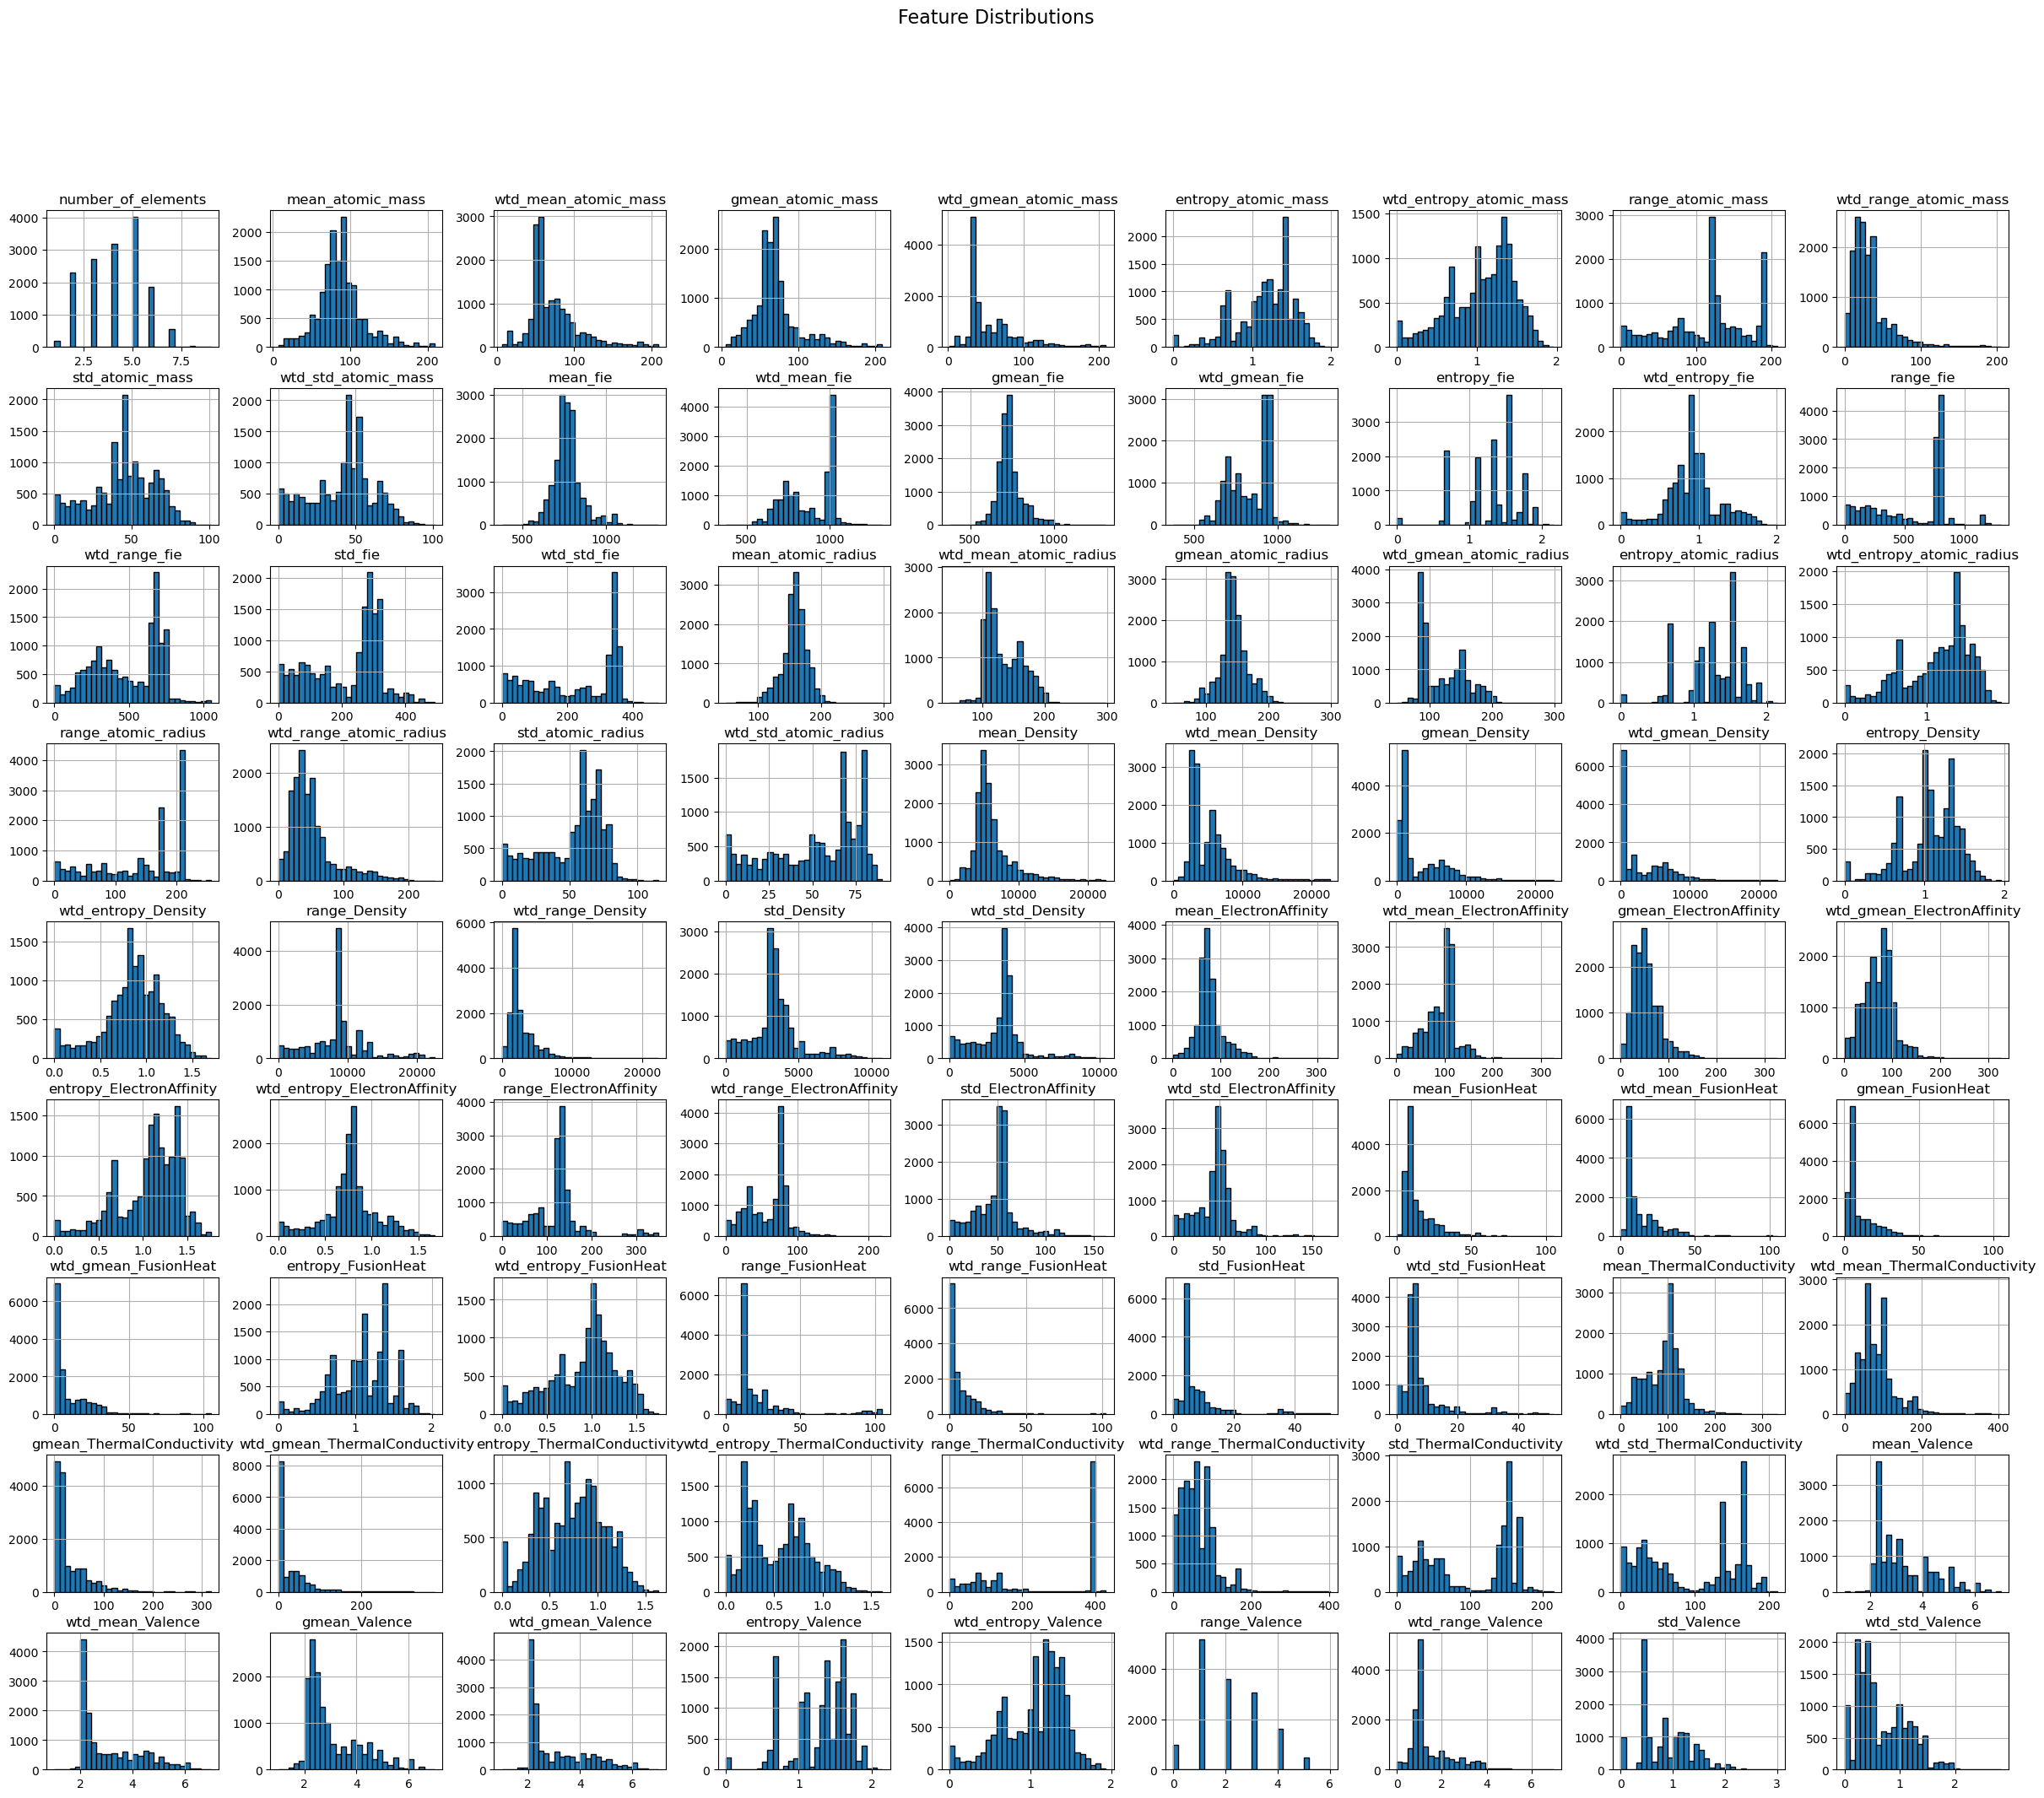

In [44]:
# Plot feature distributions for a subset of numerical features
X_df.hist(figsize=(30, 24), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


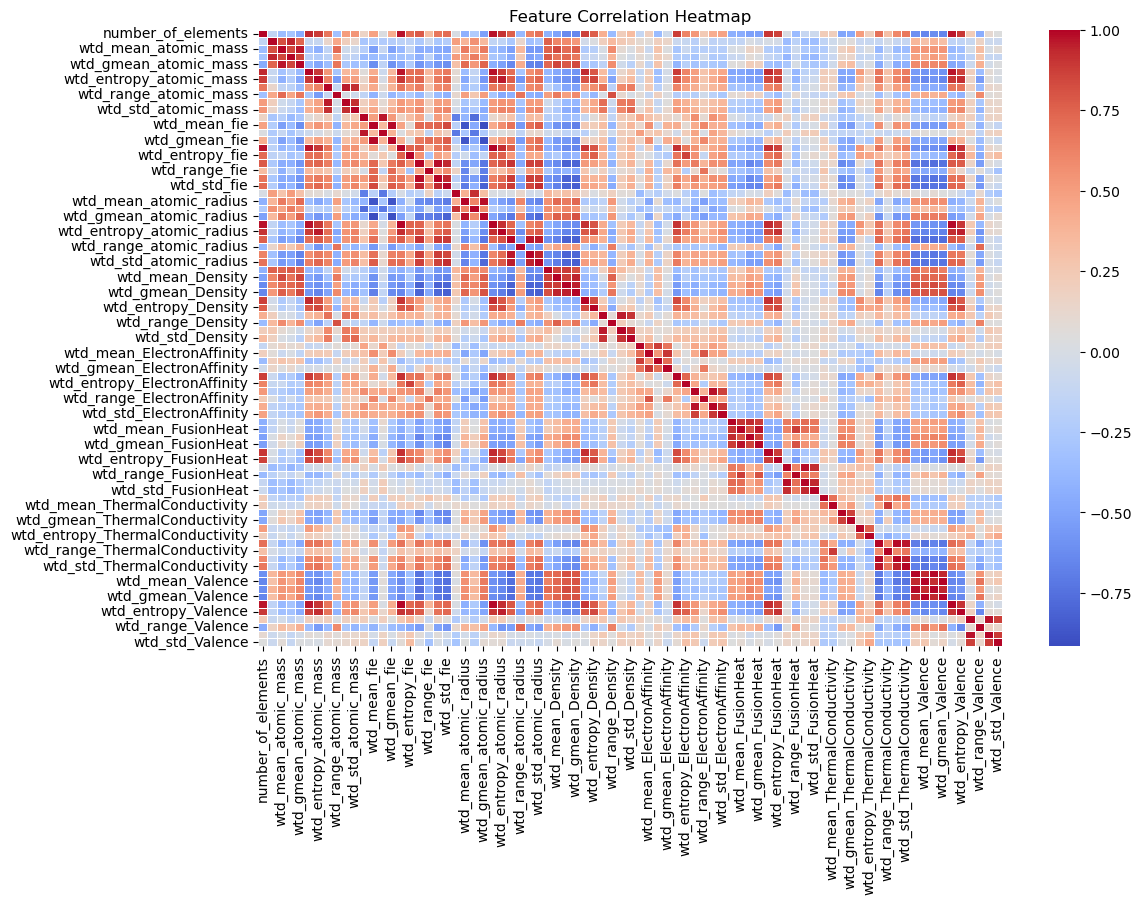

In [ ]:
# Correlations
# Compute correlation matrix
corr_matrix = X_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Checking Multicollinearity (Pairplots & VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF (Variance Inflation Factor) for a subset of features
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

# Display VIF scores
print("\nVariance Inflation Factor (VIF):")
display(vif_data.sort_values(by="VIF", ascending=False))



Variance Inflation Factor (VIF):


,Feature,VIF
12,wtd_mean_fie,310438.063789
14,wtd_gmean_fie,276907.713744
11,mean_fie,163063.019286
13,gmean_fie,144548.707695
22,wtd_mean_atomic_radius,74712.383761
...,...,...
66,wtd_entropy_ThermalConductivity,67.780351
38,wtd_range_Density,66.744183
28,wtd_range_atomic_radius,66.688317
58,wtd_range_FusionHeat,63.414057


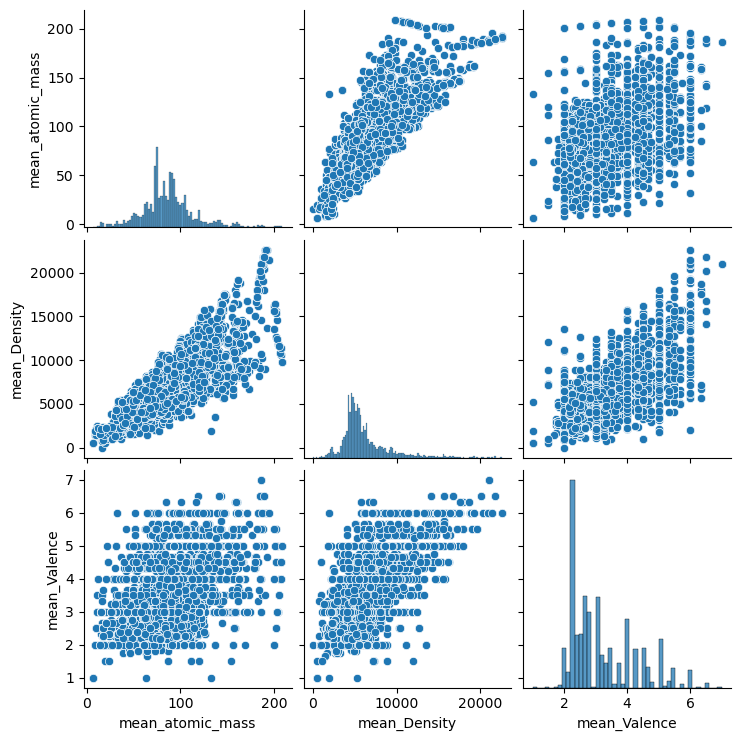

In [31]:
# Select a few features to visualize pairwise relationships
selected_features = ['mean_atomic_mass', 'mean_Density', 'mean_Valence']
sns.pairplot(X_df[selected_features])
plt.show()


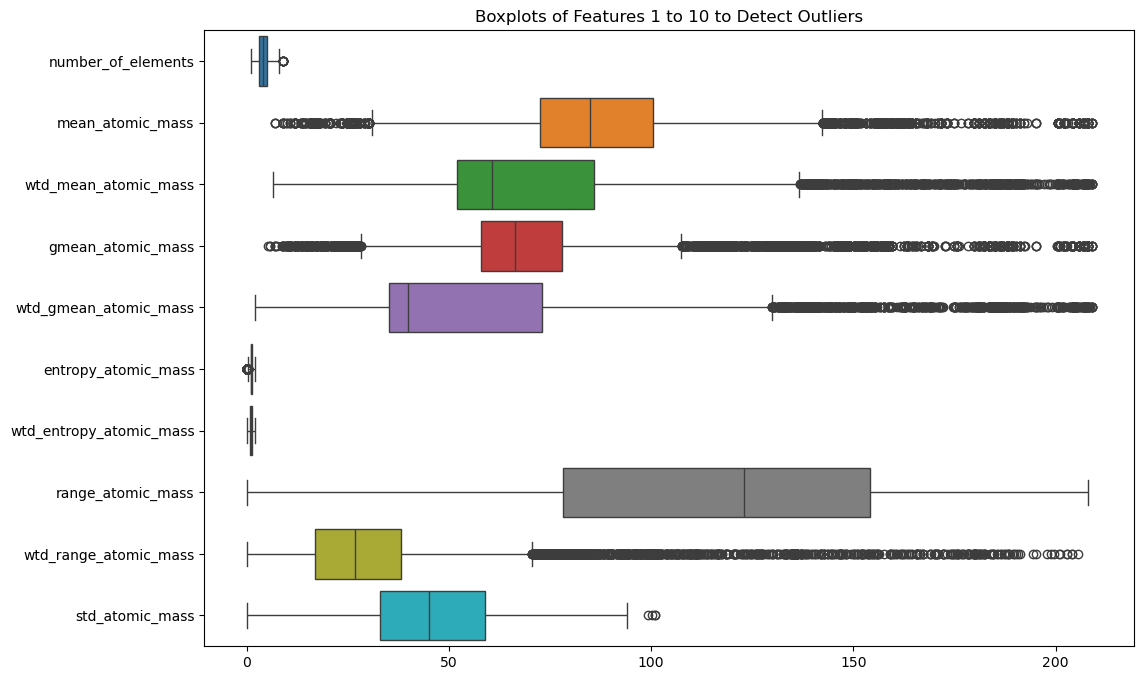

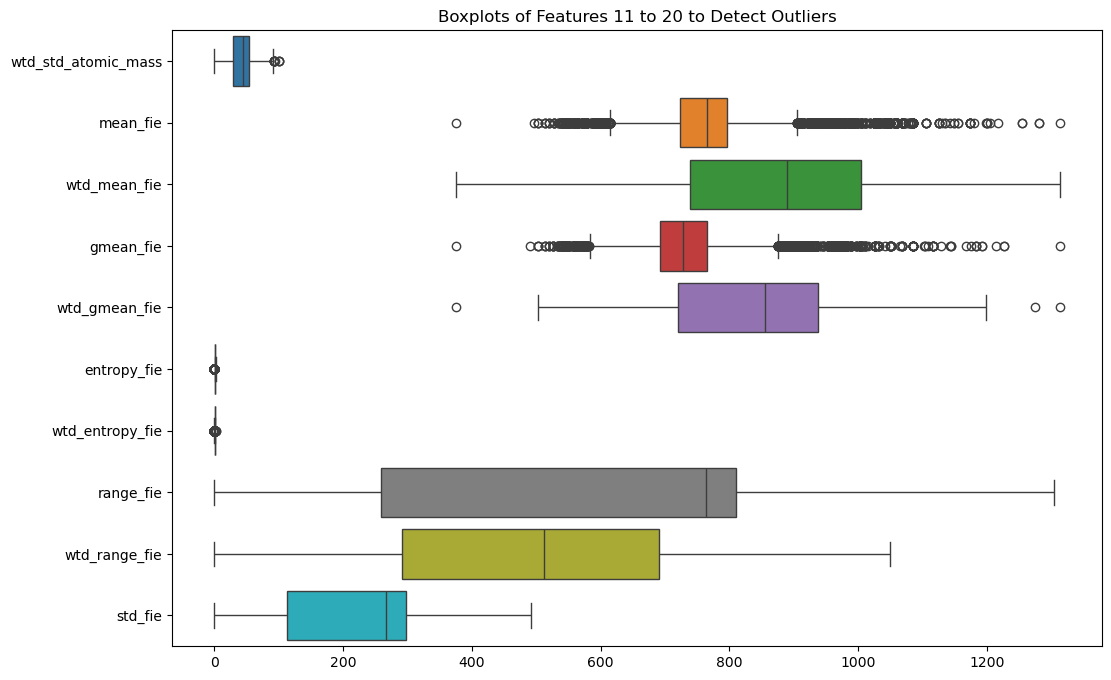

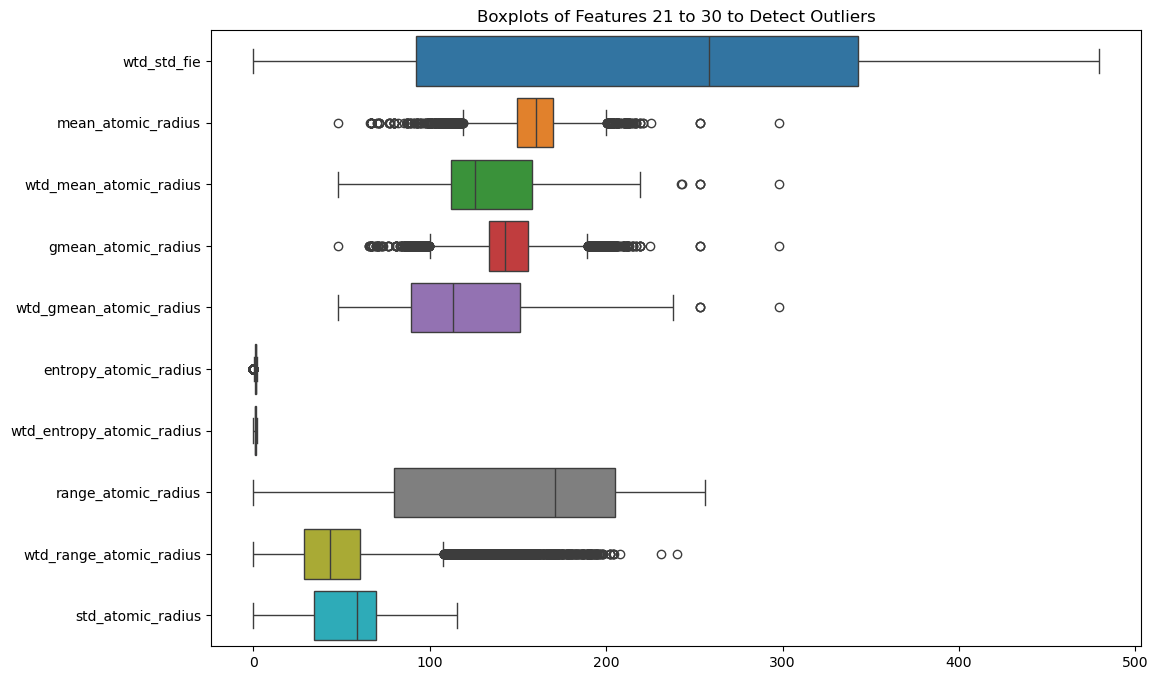

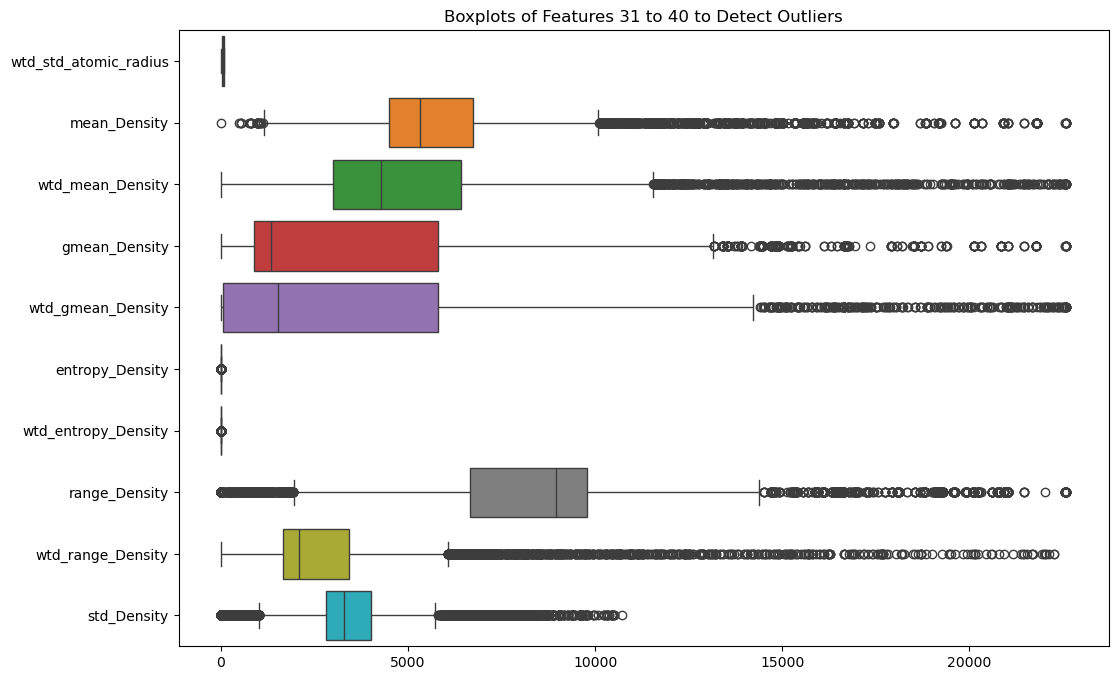

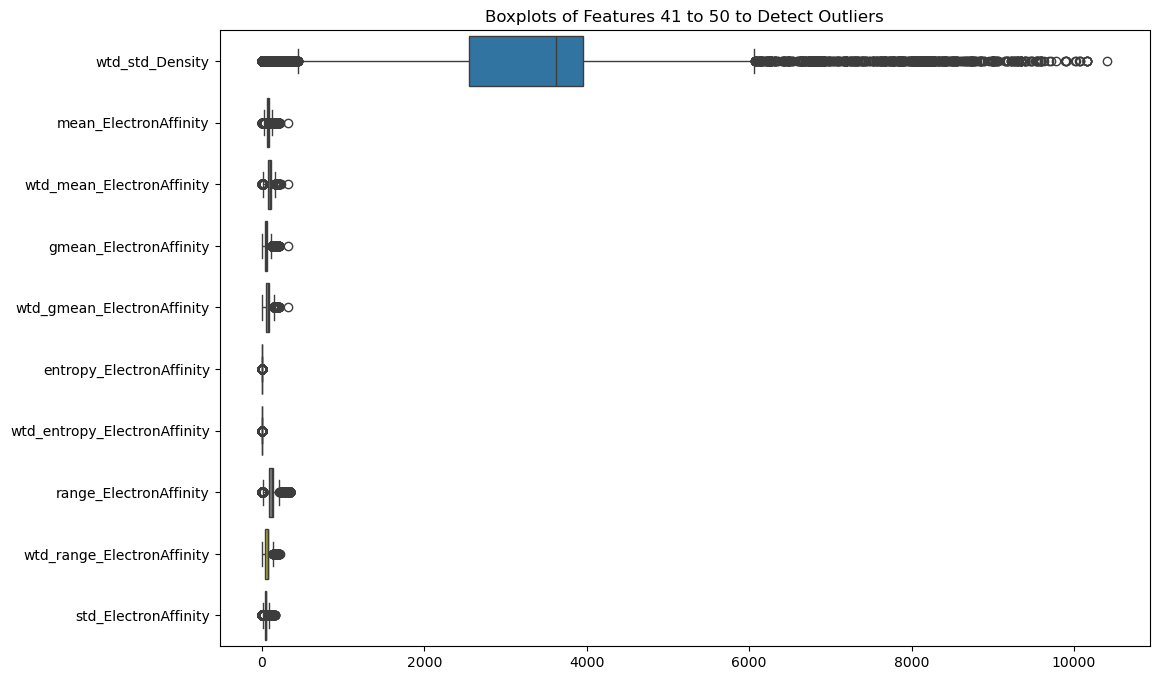

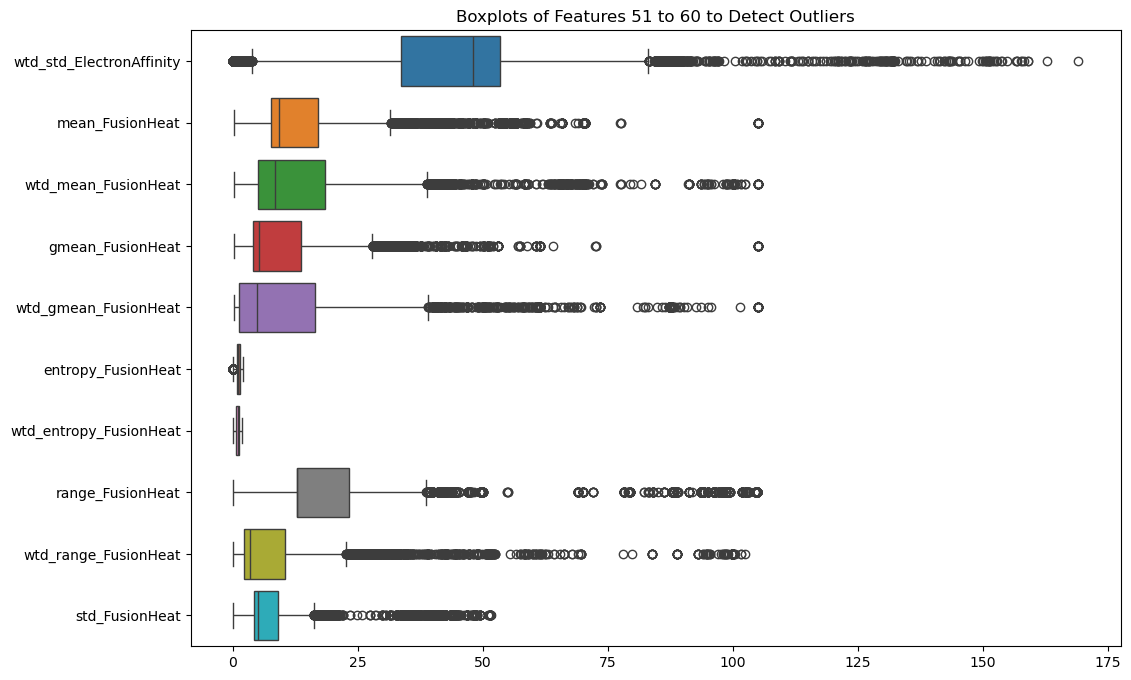

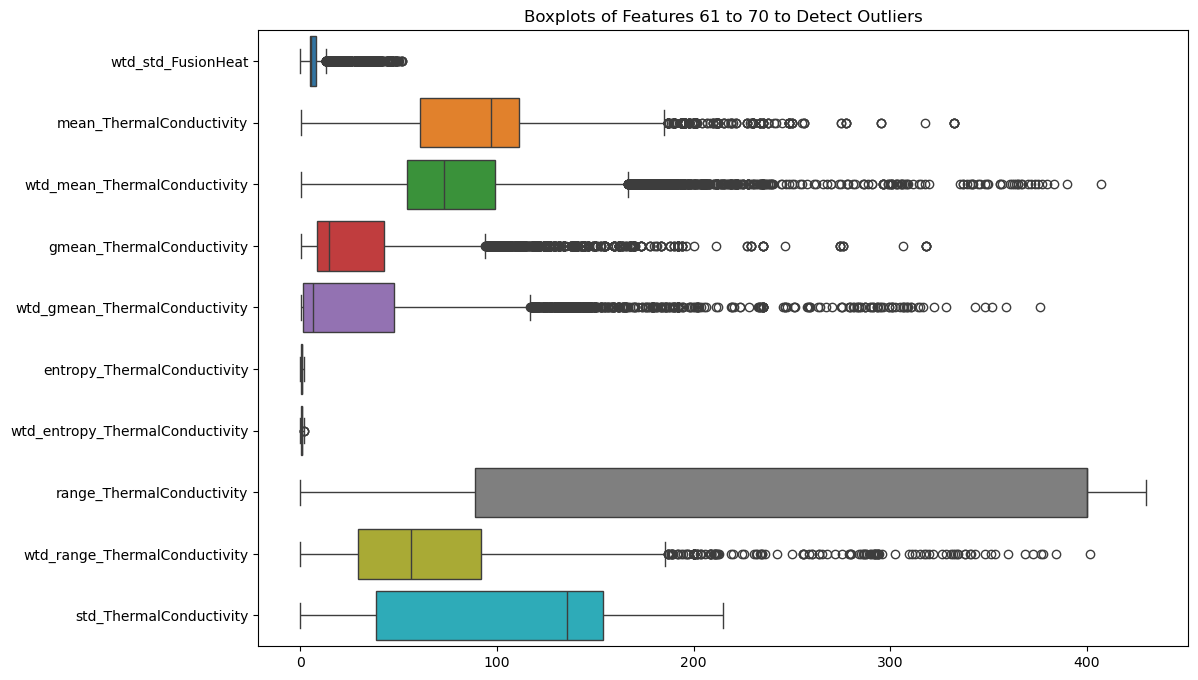

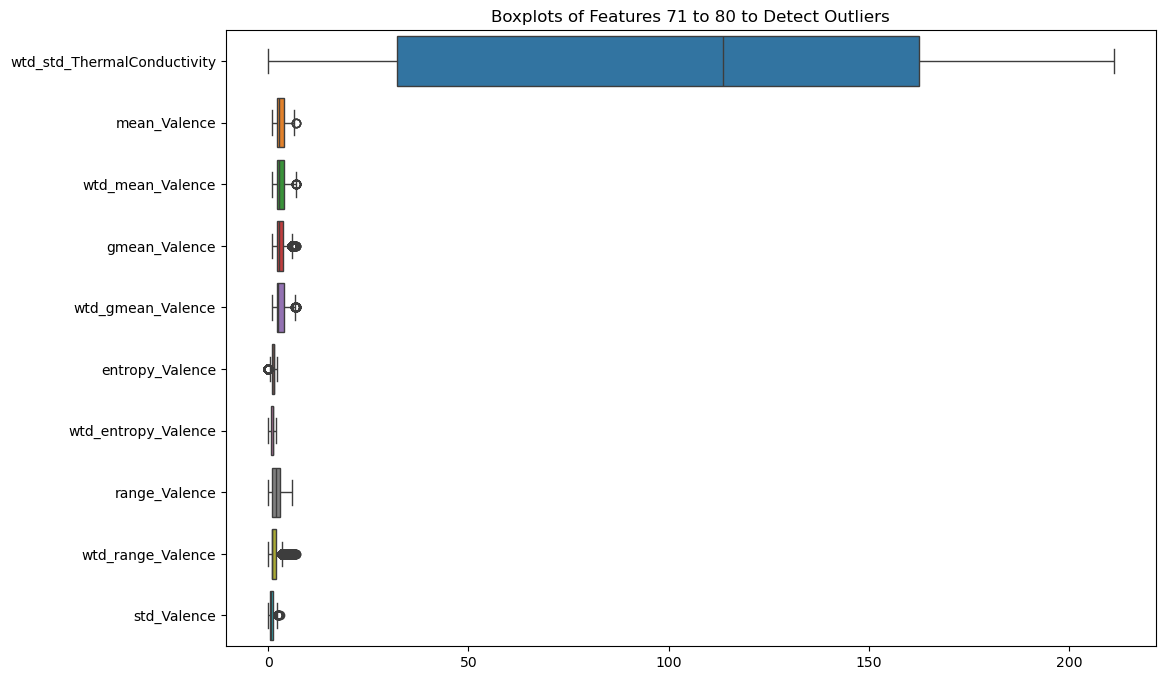

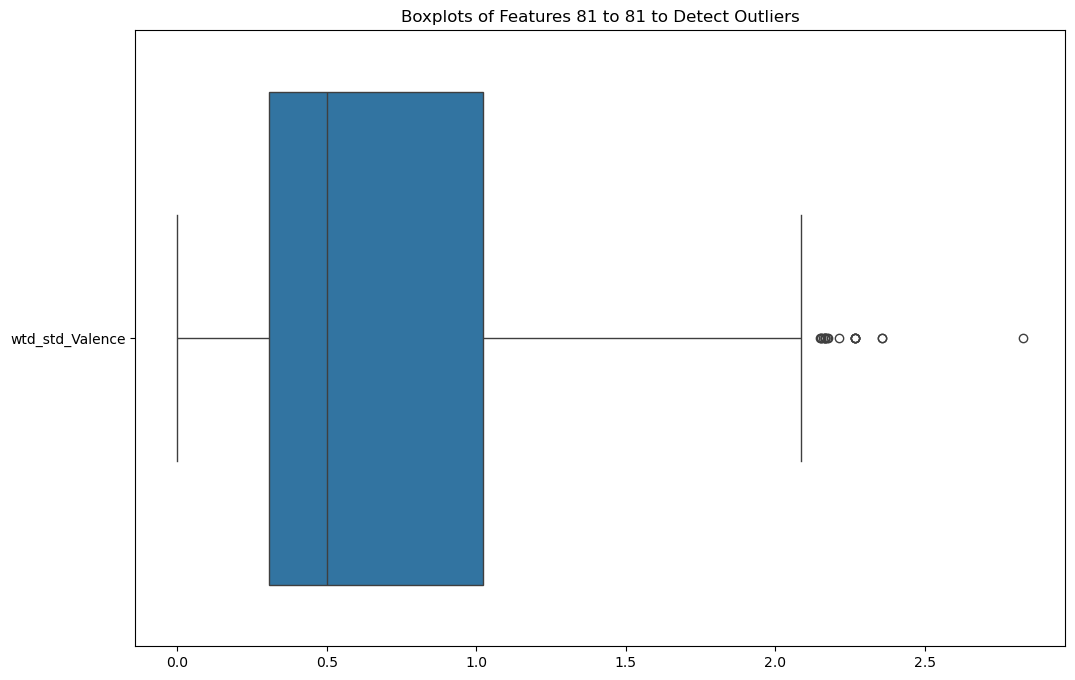

In [ ]:
# Cheking for the outliers
# instead of plotting all features in one figure, to increase the visibility we divide them into smaller subplots

# Number of features per subplot
features_per_plot = 10
num_features = X_df.shape[1]
num_plots = int(np.ceil(num_features / features_per_plot))  # Calculate the number of plots

for i in range(num_plots):
    start = i * features_per_plot
    end = start + features_per_plot
    plt.figure(figsize=(12, 8))  # Adjust figure size
    sns.boxplot(data=X_df.iloc[:, start:end], orient="h")
    plt.title(f"Boxplots of Features {start+1} to {min(end, num_features)} to Detect Outliers")
    plt.show()


#### More detailled analysis

C:\Users\user\AppData\Local\Temp\ipykernel_15520\3504912382.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




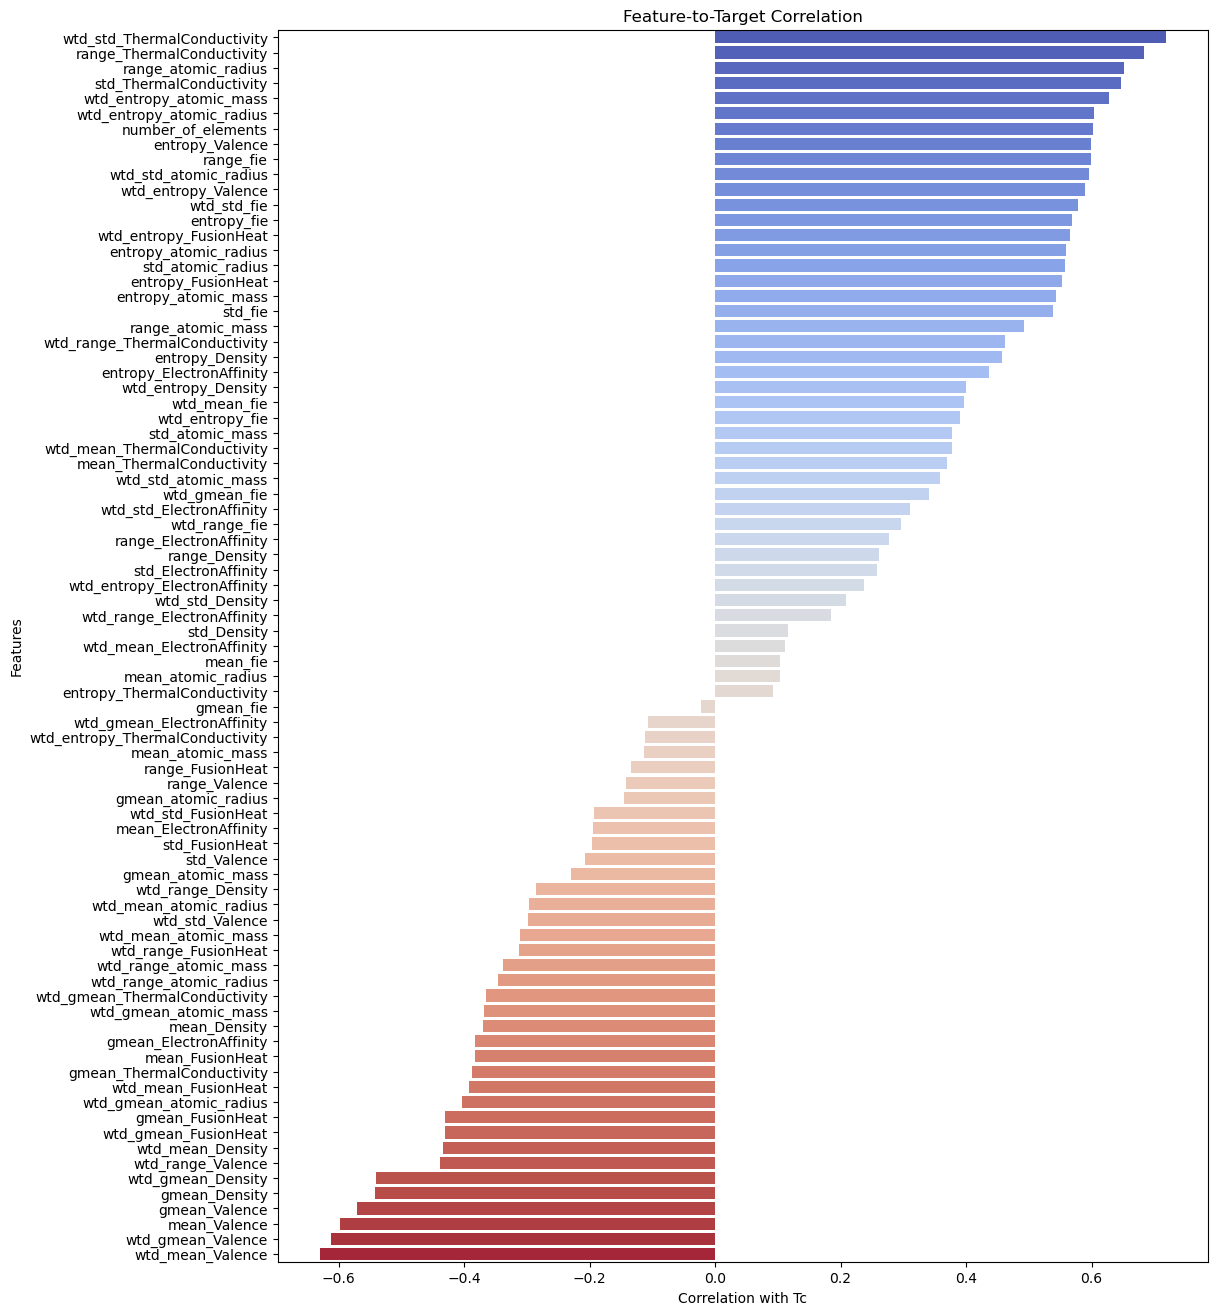

In [60]:
#  Feature-to-Target Correlation Analysis

feature_target_corr = X_df.corrwith(y).sort_values(ascending=False)

# Plot correlation values
plt.figure(figsize=(12, 16))
sns.barplot(x=feature_target_corr.values, y=feature_target_corr.index, palette="coolwarm")
plt.xlabel("Correlation with Tc")
plt.ylabel("Features")
plt.title("Feature-to-Target Correlation")
plt.show()


In [64]:
chemical_elements = pd.read_csv("data/additional_data/unique_m.csv")
chemical_elements

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.84,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.00,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.80,0.0,0.0,0.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.69,0.0,0.0,0.0,0.0,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


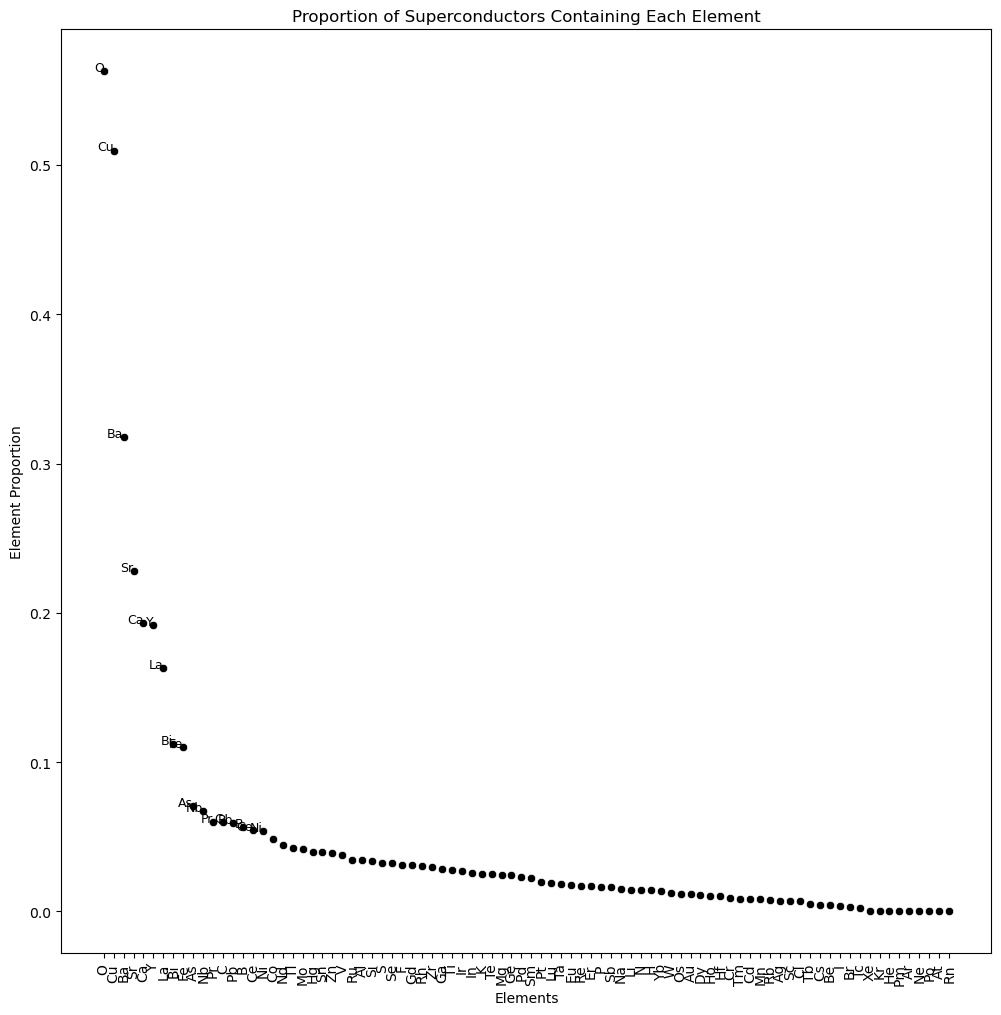

In [ ]:
element_counts = (chemical_elements.drop(columns=['critical_temp', 'material']) > 0).sum()

element_proportions = element_counts / len(chemical_elements)

element_proportions = element_proportions.sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.scatterplot(x=element_proportions.index, y=element_proportions.values, color='black')

for i, txt in enumerate(element_proportions.index):
    if element_proportions.values[i] > 0.05:  # showing labels only for common elements
        plt.text(i, element_proportions.values[i], txt, ha='right', fontsize=9)

plt.xticks(rotation=90)
plt.ylabel("Element Proportion")
plt.xlabel("Elements")
plt.title("Proportion of Superconductors Containing Each Element")
plt.show()


To complete the observation of the plot above, check the table (This table reports summary statistics on iron-based versus non-iron, and cuprate versus
 non-cuprate superconductors) below:

In [ ]:
# defition of the categories

iron_based = chemical_elements[chemical_elements['Fe'] > 0]
non_iron_based = chemical_elements[chemical_elements['Fe'] == 0]

cuprates = chemical_elements[chemical_elements['Cu'] > 0]
non_cuprates = chemical_elements[chemical_elements['Cu'] == 0]

def compute_summary_stats(df):
    return {
        "Size": len(df),
        "Min": df['critical_temp'].min(),
        "Q1": df['critical_temp'].quantile(0.25),
        "Median": df['critical_temp'].median(),
        "Q3": df['critical_temp'].quantile(0.75),
        "Max": df['critical_temp'].max(),
        "SD": df['critical_temp'].std()
    }

summary_stats = pd.DataFrame({
    "Iron-Based": compute_summary_stats(iron_based),
    "Non-Iron-Based": compute_summary_stats(non_iron_based),
    "Cuprates": compute_summary_stats(cuprates),
    "Non-Cuprates": compute_summary_stats(non_cuprates)
}).T  # Transpose to get a readable format

print(summary_stats)


                   Size      Min     Q1  Median     Q3    Max         SD
Iron-Based       2339.0  0.01800  11.25    21.7  35.50  130.0  21.433297
Non-Iron-Based  18924.0  0.00021   4.80    19.6  68.00  185.0  35.408762
Cuprates        10838.0  0.00100  29.70    61.1  85.03  143.0  32.061125
Non-Cuprates    10425.0  0.00021   2.60     5.8  12.50  185.0  10.747031


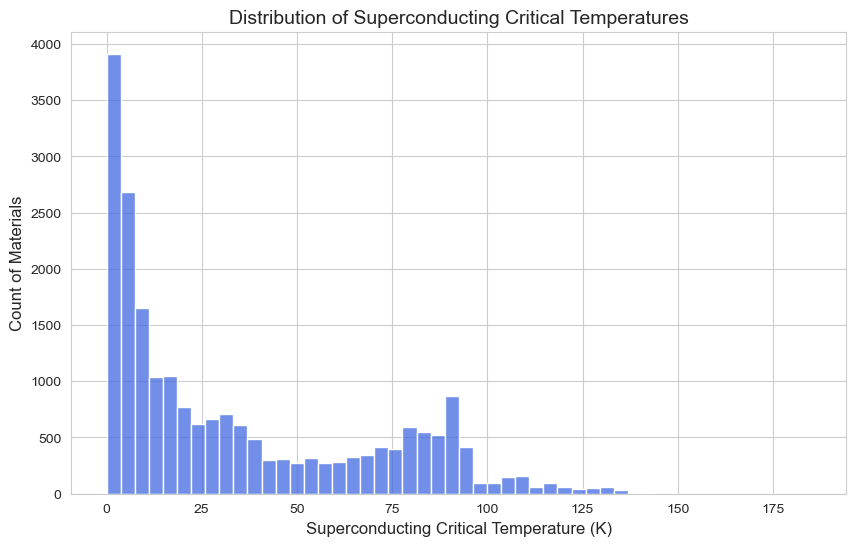

In [72]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(chemical_elements['critical_temp'], bins=50, kde=False, color="royalblue")

plt.xlabel("Superconducting Critical Temperature (K)", fontsize=12)
plt.ylabel("Count of Materials", fontsize=12)
plt.title("Distribution of Superconducting Critical Temperatures", fontsize=14)

plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


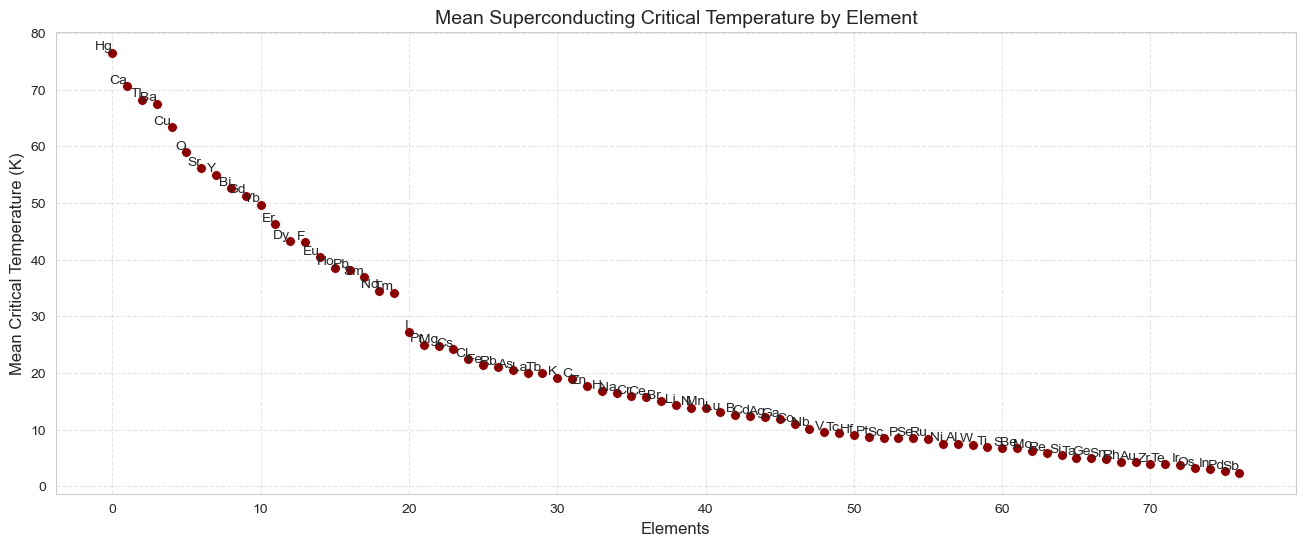

In [79]:
element_means = chemical_elements.drop(columns=["critical_temp", "material"]).multiply(
    chemical_elements["critical_temp"], axis=0
).sum() / chemical_elements.drop(columns=["critical_temp", "material"]).sum()

element_means = element_means.sort_values(ascending=False)

plt.figure(figsize=(16, 6))
sns.scatterplot(x=range(len(element_means)), y=element_means.values, color="darkred", s=50)

# annotate each point with its element name
for i, element in enumerate(element_means.index):
    plt.text(i, element_means[element], element, fontsize=10, ha='right', va='bottom')

plt.xlabel("Elements", fontsize=12)  # X-axis is just an index now
plt.ylabel("Mean Critical Temperature (K)", fontsize=12)
plt.title("Mean Superconducting Critical Temperature by Element", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
element_means = chemical_elements.drop(columns=["critical_temp", "material"]).multiply(
    chemical_elements["critical_temp"], axis=0
).sum() / chemical_elements.drop(columns=["critical_temp", "material"]).sum()

element_means = element_means.sort_values(ascending=False)

plt.figure(figsize=(16, 6))
sns.scatterplot(x=range(len(element_means)), y=element_means.values, color="darkred", s=50)

# annotate each point with its element name
for i, element in enumerate(element_means.index):
    plt.text(i, element_means[element], element, fontsize=10, ha='right', va='bottom')

plt.xlabel("Elements", fontsize=12)  # X-axis is just an index now
plt.ylabel("Mean Critical Temperature (K)", fontsize=12)
plt.title("Mean Superconducting Critical Temperature by Element", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


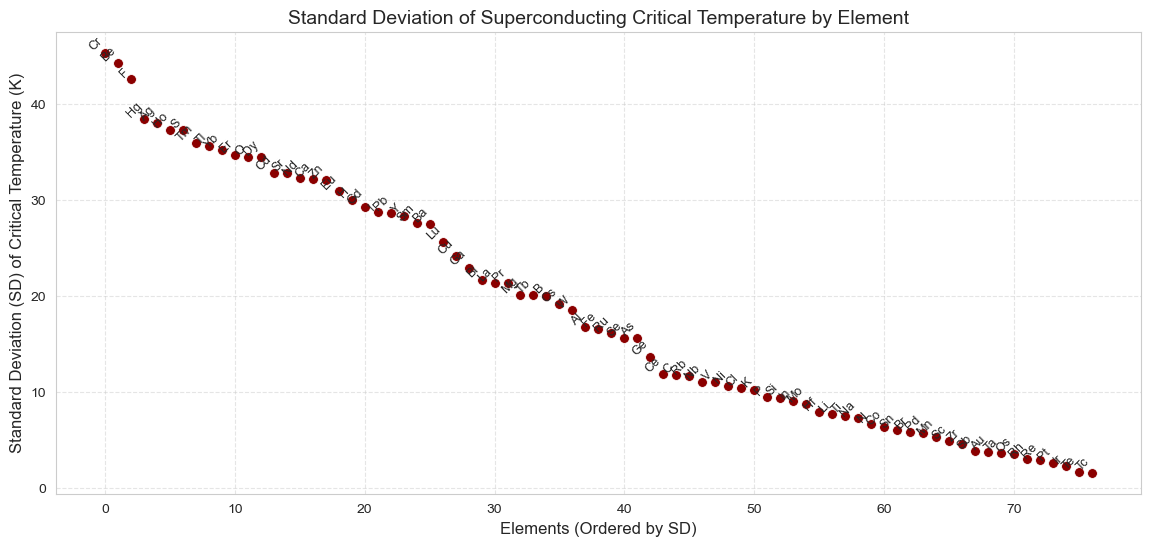

In [82]:
element_columns = [col for col in chemical_elements.columns if col not in ['critical_temp', 'material']]

element_sd = {}
for element in element_columns:
    tc_values = chemical_elements.loc[chemical_elements[element] == 1, "critical_temp"]
    if len(tc_values) > 1:  # SD is meaningful only if at least two Tc values exist
        element_sd[element] = tc_values.std()

element_sd_df = pd.DataFrame(list(element_sd.items()), columns=['Element', 'SD_Tc'])

element_sd_df = element_sd_df.sort_values(by="SD_Tc", ascending=False)

plt.figure(figsize=(14, 6))
sns.scatterplot(x=range(len(element_sd_df)), y=element_sd_df["SD_Tc"], color="darkred", s=50)

for i, (element, sd_value) in enumerate(zip(element_sd_df["Element"], element_sd_df["SD_Tc"])):
    plt.text(i, sd_value, element, fontsize=9, ha="right", va="bottom", rotation=45)

plt.xlabel("Elements (Ordered by SD)", fontsize=12)
plt.ylabel("Standard Deviation (SD) of Critical Temperature (K)", fontsize=12)
plt.title("Standard Deviation of Superconducting Critical Temperature by Element", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


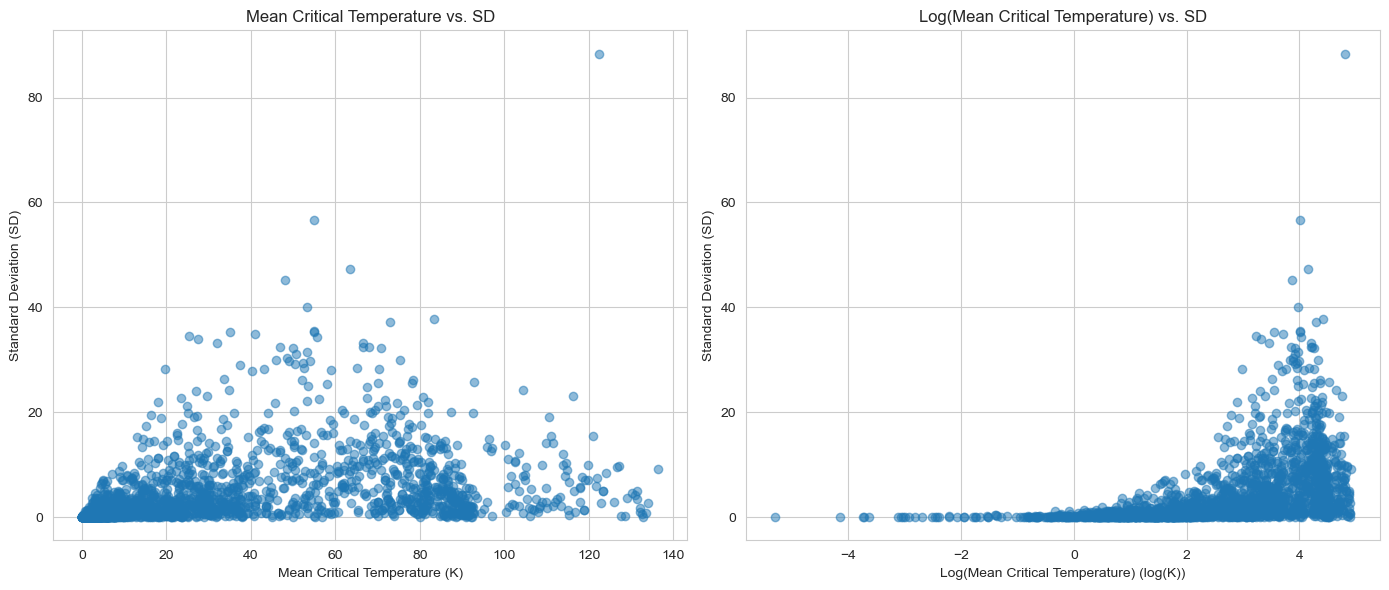

In [83]:
element_stats = chemical_elements.groupby('material')['critical_temp'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(14, 6))

# Left panel: Mean critical temperature vs. Standard Deviation
plt.subplot(1, 2, 1)
plt.scatter(element_stats['mean'], element_stats['std'], alpha=0.5)
plt.xlabel('Mean Critical Temperature (K)')
plt.ylabel('Standard Deviation (SD)')
plt.title('Mean Critical Temperature vs. SD')

# Right panel: Logarithm of mean critical temperature vs. Standard Deviation
plt.subplot(1, 2, 2)
plt.scatter(np.log(element_stats['mean']), element_stats['std'], alpha=0.5)
plt.xlabel('Log(Mean Critical Temperature) (log(K))')
plt.ylabel('Standard Deviation (SD)')
plt.title('Log(Mean Critical Temperature) vs. SD')

plt.tight_layout()
plt.show()

#### Feature importance analysis

Inorder to have an idea about the revelant features, we use a Machine Learning-Based Importance to rank features by their predictive power.

We can start by trying with a the model `Random Forests` to see what are the revelant features through this model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit a RandomForest model to estimate feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_df, y)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X_df.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


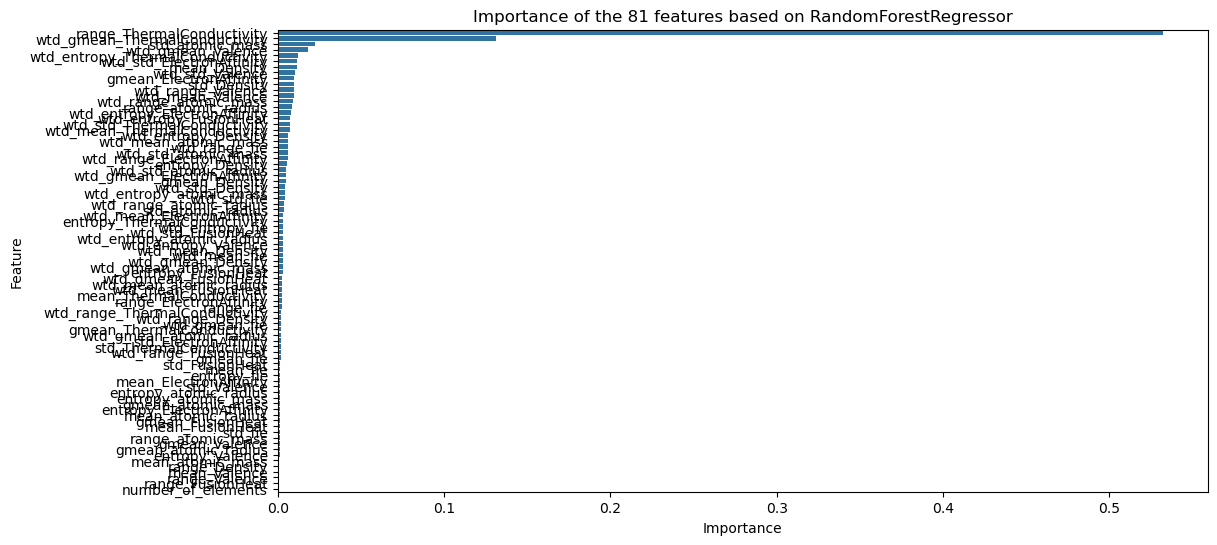

In [47]:
# Plot feature importance (all the 81 features)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Importance of the 81 features based on RandomForestRegressor")
plt.show()

In [57]:
print("Top 20 important features based on RandomForestRegressor")
feature_importances[:20]

Top 20 important features based on RandomForestRegressor


,Feature,Importance
67,range_ThermalConductivity,0.532468
64,wtd_gmean_ThermalConductivity,0.130894
9,std_atomic_mass,0.022670
74,wtd_gmean_Valence,0.018464
66,wtd_entropy_ThermalConductivity,0.012377
50,wtd_std_ElectronAffinity,0.011666
31,mean_Density,0.011494
80,wtd_std_Valence,0.010213
43,gmean_ElectronAffinity,0.009905
39,std_Density,0.009707


# Challenge evaluation

## Naive approach
The primary metric for evaluating participants' submissions will be the Root Mean Squared Error (RMSE). RMSE is a widely used metric for regression tasks and is particularly suitable for this challenge because it penalizes larger errors more heavily, ensuring that predictions are as close as possible to the actual critical temperature values. The formula for RMSE is:

Where:
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
$$

Where:

- \( y_i \) is the actual critical temperature for the \( i \)-th superconductor.
- \( \hat{y_i} \) is the predicted critical temperature for the \( i \)-th superconductor.
- \( n \) is the total number of samples in the evaluation set.


The goal for participants is to minimize the RMSE, as lower values indicate better predictive performance.

### Advanced Approach

To ensure robust evaluation of the model's performance, we use an **out-of-sample RMSE** estimation procedure. This approach involves repeatedly splitting the data into training and validation sets, fitting the model, and calculating the out-of-sample RMSE. The steps are as follows:

1. **Randomly Split the Data**:
   - Divide the dataset `X_df` and `y` into **2/3 training data `X_train`, `y_train`** and **1/3 `X_val`, `y_val` validation data** at random.

2. **Fit the Model**:
   - Train the model using the **training data**.

3. **Predict on Validation Data**:
   - Use the trained model to predict the critical temperature (\(T_c\)) for the **validation data**.

4. **Calculate Out-of-Sample MSE**:
   - Compute the out-of-sample mean-squared-error (MSE) using the predictions and the observed \(T_c\) values in the validation data:
     $$
     \text{out-of-sample MSE} = \text{Average of } (\text{observed} - \text{predicted})^2
     $$

5. **Repeat the Process**:
   - Repeat steps 1 through 4 **25 times** to collect **25 out-of-sample MSEs**.

6. **Calculate Final Out-of-Sample RMSE**:
   - Take the mean of the 25 collected out-of-sample MSEs and report the square root of this average as the final estimate of the out-of-sample RMSE:
     $$
     \text{out-of-sample RMSE} = \sqrt{\text{Mean of out-of-sample MSEs}}
     $$
     

This procedure ensures that the model's performance is evaluated on unseen data multiple times, providing a reliable estimate of its generalization ability. The repeated random splitting helps account for variability in the data and reduces the risk of overfitting.

## Base model

In [6]:
pip install --upgrade pandas matplotlib seaborn numpy

  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn import set_config
set_config(transform_output="pandas")

# Load data
X_df, y = problem.get_train_data()
X_df_test, y_test = problem.get_test_data()

# Define the pipeline
pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        random_state=42
    )
)

def get_estimator():
    return pipe

# Function to calculate out-of-sample RMSE
def calculate_out_of_sample_rmse(X, y, n_repeats=25):
    # Ensure y is a pandas Series
    if isinstance(y, np.ndarray):
        y = pd.Series(y)

    # Ensure y is a pandas Series
    if isinstance(X, np.ndarray):
        X = pd.Series(X)

    mse_list = []

    for _ in range(n_repeats):
        # Step 1: Randomly split the data into training and validation sets
        indices = np.random.permutation(len(X))
        split_idx = int(2/3 * len(X))
        train_idx, val_idx = indices[:split_idx], indices[split_idx:]

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Step 2: Fit the model
        pipe.fit(X_train, y_train)

        # Step 3: Predict on validation data
        y_pred = pipe.predict(X_val)

        # Step 4: Calculate out-of-sample MSE
        mse = mean_squared_error(y_val, y_pred)
        mse_list.append(mse)

    # Step 6: Calculate final out-of-sample RMSE
    out_of_sample_rmse = np.sqrt(np.mean(mse_list))
    return out_of_sample_rmse

# Fit the pipeline on the full training data (fitting data) and evaluate on test data (unseen data during learning proccess)
# Calculate out-of-sample RMSE on X_df , y (fitting data)
print(f"Score on train: {calculate_out_of_sample_rmse(X_df, y)}")
print(f"Score on test: {calculate_out_of_sample_rmse(X_df_test, y_test)}")


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

# Submission format

Here, you should describe the submission format. This is the format the participants should follow to submit their predictions on the RAMP plateform.

This section also show how to use the `ramp-workflow` library to test the submission locally.

## The pipeline workflow

The input data are stored in a dataframe. To go from a dataframe to a numpy array we will use a scikit-learn column transformer. The first example we will write will just consist in selecting a subset of columns we want to work with.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        random_state=42
    )
)

def get_estimator():
    return pipe


## Testing using a scikit-learn pipeline

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(get_estimator(), X_df, y, cv=5, scoring='accuracy')
print(scores)

[0.97222222 0.96527778 0.97212544 0.95121951 0.96167247]


## Submition:

Once you found a good model, you can submit it to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event. Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your sandbox and write the code for your classifier directly on the browser. You can also create a new folder `my_submission` in the `submissions` folder containing `estimator.py` and upload this file directly. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in `my submissions` Once it is trained, your submission shows up on the `public leaderboard`.
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in `my submissions`. You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the `leaderboard` is the mean average precision score (`mean AP`). When the score is good enough, you can submit it at the RAMP.

## More information
You can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).

## Questions

Questions related to the starting kit should be asked on the [issue tracker](https://github.com/ramp-kits/tephra/issues).